In [1]:
import numpy as np
import scipy.io as sio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 导入数据
file_path = r"C:\Users\79365\Desktop\图像-叶绿素\叶绿素\matlab数据\280数据\280.mat"
data = sio.loadmat(file_path)

X shape: (280, 25), Y shape: (280, 1)


c:\Users\79365\anaconda3\envs\42\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


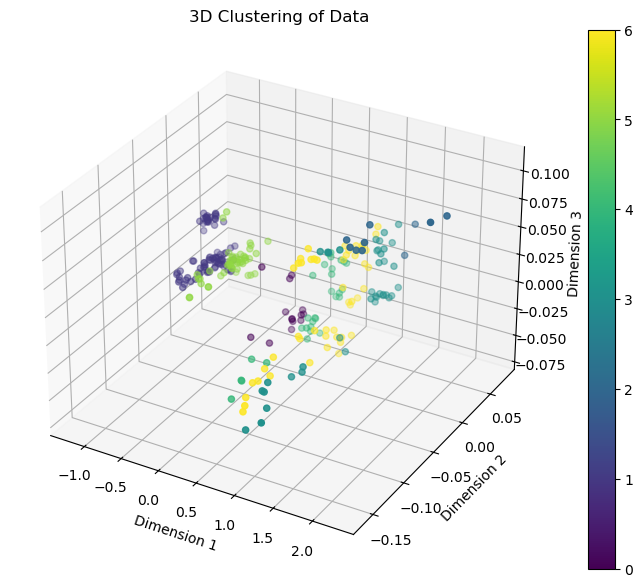

In [3]:
# 提取 X 和 Y
X = data['X']
Y = data['Y']

# 检查数据形状
print(f"X shape: {X.shape}, Y shape: {Y.shape}")

# 如果 X 是二维，降维到三维
# 示例假设 X 已经是 280 × 3
if X.shape[1] > 3:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)

# 进行 K-means 聚类
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X)

# 可视化结果
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')

# 添加标题和标签
ax.set_title("3D Clustering of Data")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

# 添加颜色条
plt.colorbar(scatter, ax=ax)
plt.show()